# Sentiment Analysis of Song Titles and their Relationship to Economic Indicators
As an extension to the main study, we explored whether musical sentiment, exhibits any patterns across genres and time, and whether it correlates with economic changes.

To quantify sentiment, we applied VADER sentiment analysis model to song titles (due to time constraints, sentiment analysis was performed on song titles rather than full song lyrics).This model outputs four scores per song: sentiment_neg, sentiment_neu, sentiment_pos, and a sentiment_compound score which combines the individual components into a single polarity measure ranging from -1 (strongly negative) to 1 (strongly positive). Sentiment analysis for song titles instead of song lyrics was done due to time limitations.


## Using VADER (from NLTK)
VANDER is a sentiment analysis tool in Python that provides a pre-trained model for sentiment analysis. It works by using a dictionary of words and rules to calculate a polarity score (-1 being very negative, +1 being very positive). VANDER was specifically developed for social media text, perfect for our project as song titles will be short pieces of text with very little context. 


## Imports

In [ ]:
# Install nltk to use vader
#!pip install nltk

In [9]:
# You will need the vader_lexicon file to run the model, if this cell doesn't work, try the next one
# import nltk
# nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1018)>


False

In [1]:
# import nltk
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yrinavera/nltk_data...


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Perform Sentiment Analysis on our data

In [3]:
# Load the spotify_dataset with all tracks
data = pd.read_csv('../data/spotify_dataset_new.csv')
data['genre'].value_counts().head(10)

genre
Pop        2207
Rap        1173
Rock        862
Hip-Hop     749
Grime       741
R&B         463
Indie       414
Drill       396
Unknown     368
House       329
Name: count, dtype: int64

In [5]:
# Function to print sentiments of the sentence.
def sentiment_score(title):
    "Output: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.1}"
    # Create a SentimentIntensityAnalyzer object.
    analyzer = SentimentIntensityAnalyzer()
    
    # Obatain polarity scores dictionary 
    scores = analyzer.polarity_scores(title)
        
    return scores

In [6]:
# Perform sentiment analysis, extract all sentiment scores
data['sentiment_scores'] = data['song_name'].apply(sentiment_score)
data[['sentiment_neg','sentiment_neu','sentiment_pos','sentiment_compound']]= data['sentiment_scores'].apply(pd.Series)
data.drop(columns='sentiment_scores',inplace=True)
data.sample(5)

# '''
# From manual inspection of the song_name and the calculated scores, sentiment_neg usually better captures the real sentiment.
# '''

,artist,song_name,quarterly_date,n_streams,genre,Genre_Group,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
8906,Lil Nas X,DOLLA SIGN SLIME (feat. Megan Thee Stallion),2021 Q3,524260.0,Hip-Hop,Rap/Hip-Hop,0.0,1.000,0.000,0.0000
9034,"John Lennon, Yoko Ono",Happy Xmas (War Is Over) - Remastered 2010,2021 Q4,10051803.0,Christmas,Christmas,0.0,0.619,0.381,0.5719
8736,Nelly Furtado,Promiscuous,2021 Q3,2184816.0,Pop,Pop,1.0,0.000,0.000,-0.0772
4066,CamelPhat,Breathe,2019 Q1,5386892.0,House,Dance/House,0.0,1.000,0.000,0.0000
4675,Nipsey Hussle,Racks in the Middle (feat. Roddy Ricch and Hit...,2019 Q2,955054.0,Hip-Hop,Rap/Hip-Hop,0.0,1.000,0.000,0.0000


## Exploratory analysis 

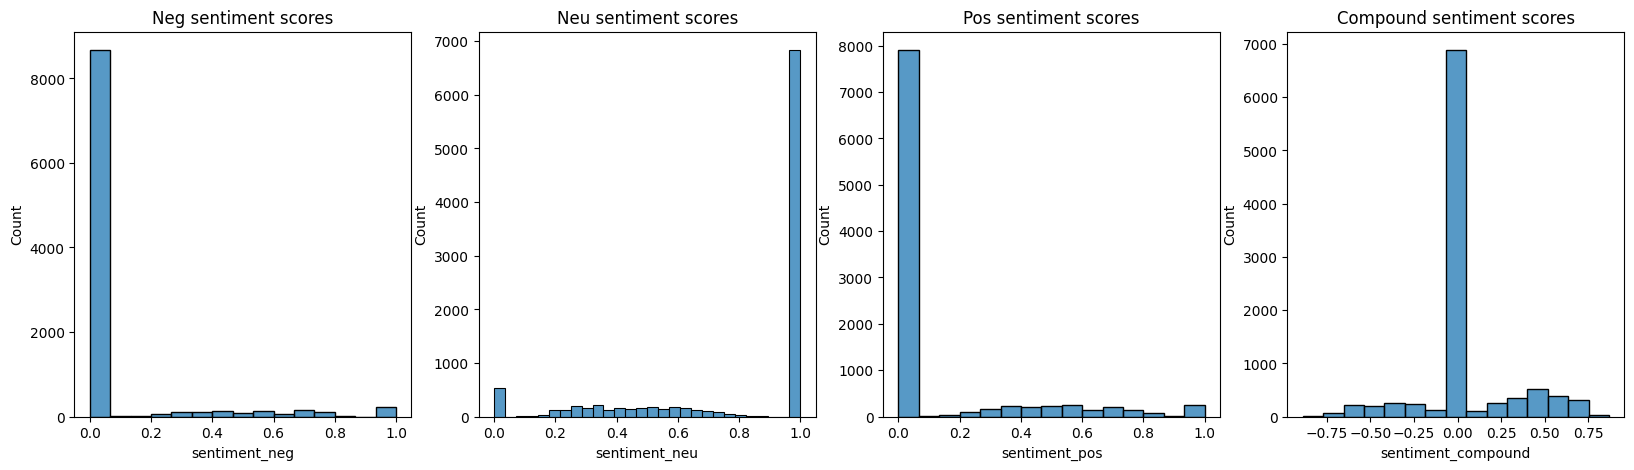

Out of 9909 rows, number of 0 values:
    - With VADER: 6852


In [7]:
# Check differences in genreal Sentiment Scores
sentiment_types = ['sentiment_neg','sentiment_neu','sentiment_pos','sentiment_compound']

plt.figure(figsize = (20,5))

for i,sentiment in enumerate(sentiment_types):
    plt.subplot(1, 4, i+1)
    sns.histplot(data[sentiment])
    plt.title(f'{sentiment.split('_')[1].title()} sentiment scores')

plt.show()

print(f'''Out of {data.shape[0]} rows, number of 0 values:
    - With VADER: {data[data['sentiment_compound'] == 0]['sentiment_compound'].count()}''')

# '''
# As expected many song titles scored 0 as many contain only one or a couple of words.
# The compound sentiment scores on each side of the polarity areas, -1 to 0 for negative and 0 to 1 for postive,
# the data points are normally distributed.
# For a better look at the data we will look at the datapoints by genre.
# '''

### Sentiment Scores by Genre

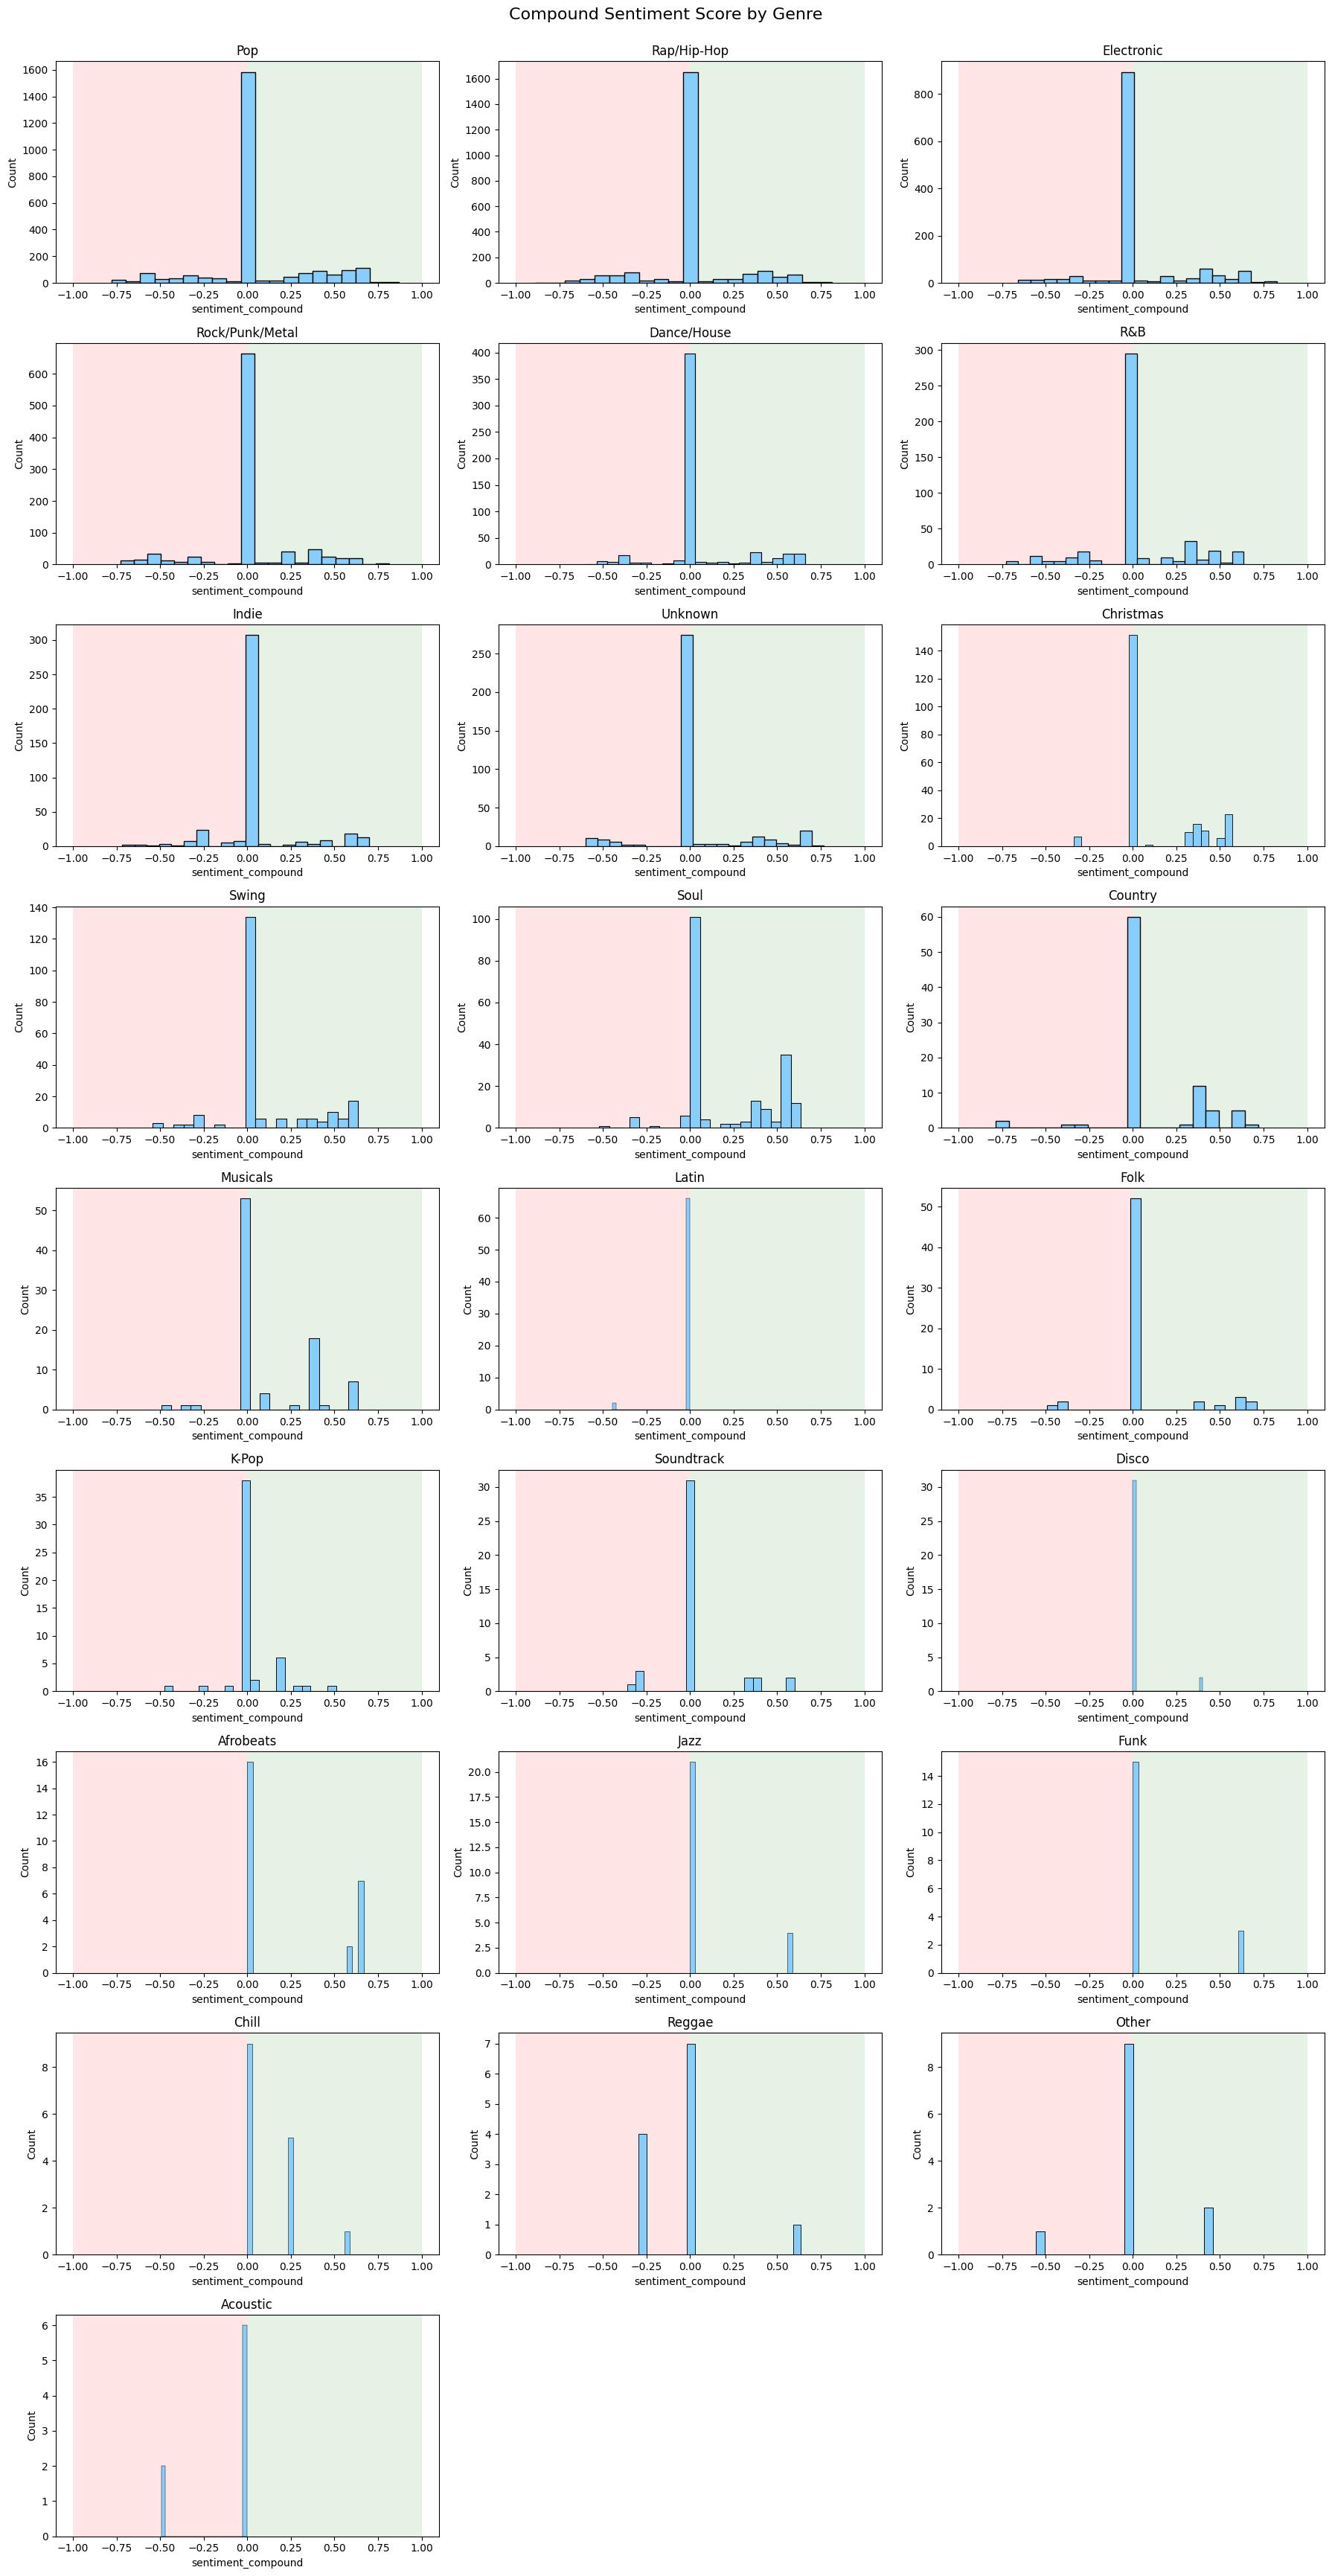

In [8]:
# Plot histograms of raw data by genre
genre_list = data['Genre_Group'].value_counts().keys()
num_genres = len(genre_list)
cols = 3
rows = math.ceil(num_genres / cols)


plt.figure(figsize=(6 * cols, 4 * rows))
plt.suptitle('Compound Sentiment Score by Genre', fontsize=16, y=0.96)

for index, genre in enumerate(genre_list):
    plt.subplot(rows, cols, index + 1)
    plt.axvspan(0, 1, facecolor='green', alpha=0.1)
    plt.axvspan(-1, 0, facecolor='red', alpha=0.1)
    sns.histplot(data[data['Genre_Group'] == genre]['sentiment_compound'], alpha=1, color='lightskyblue',bins = 20)    
    plt.title(f'{genre}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# '''
# The genres are ordered by amount of songs each genre has.
# Most histograms are overpowered by songs with neutral sentiment score (compound equal to 0, neutral equal to 1) 
# '''

In [9]:
# Get percentage of songs with neutral scores for each genre
# Count of songs per genre
genre_counts = data['Genre_Group'].value_counts()

# Counts of songs with no sentiment per genre
sentimentless_counts = data.loc[data['sentiment_neu']==1]['Genre_Group'].value_counts()

proportion_sentimentless = pd.DataFrame(round((sentimentless_counts/genre_counts)*100,0)).sort_values(by='count').rename(columns={'count':'% of neutral song titles'})
proportion_sentimentless

# '''
# Latin songs have almost 100% neutral songs reflecting that most song titles are in spanish and the model only works for English text.
# Dance/House, which is one of the most popular genres, has 72% of songs classified as neutral.
# R%B and Pop, out of the most popular genres, are the ones with least songs classified as neutral.
# '''

,% of neutral song titles
Genre_Group,
Soul,51.0
Reggae,58.0
Chill,60.0
Musicals,61.0
R&B,63.0
Swing,63.0
Afrobeats,64.0
Pop,66.0
Christmas,67.0


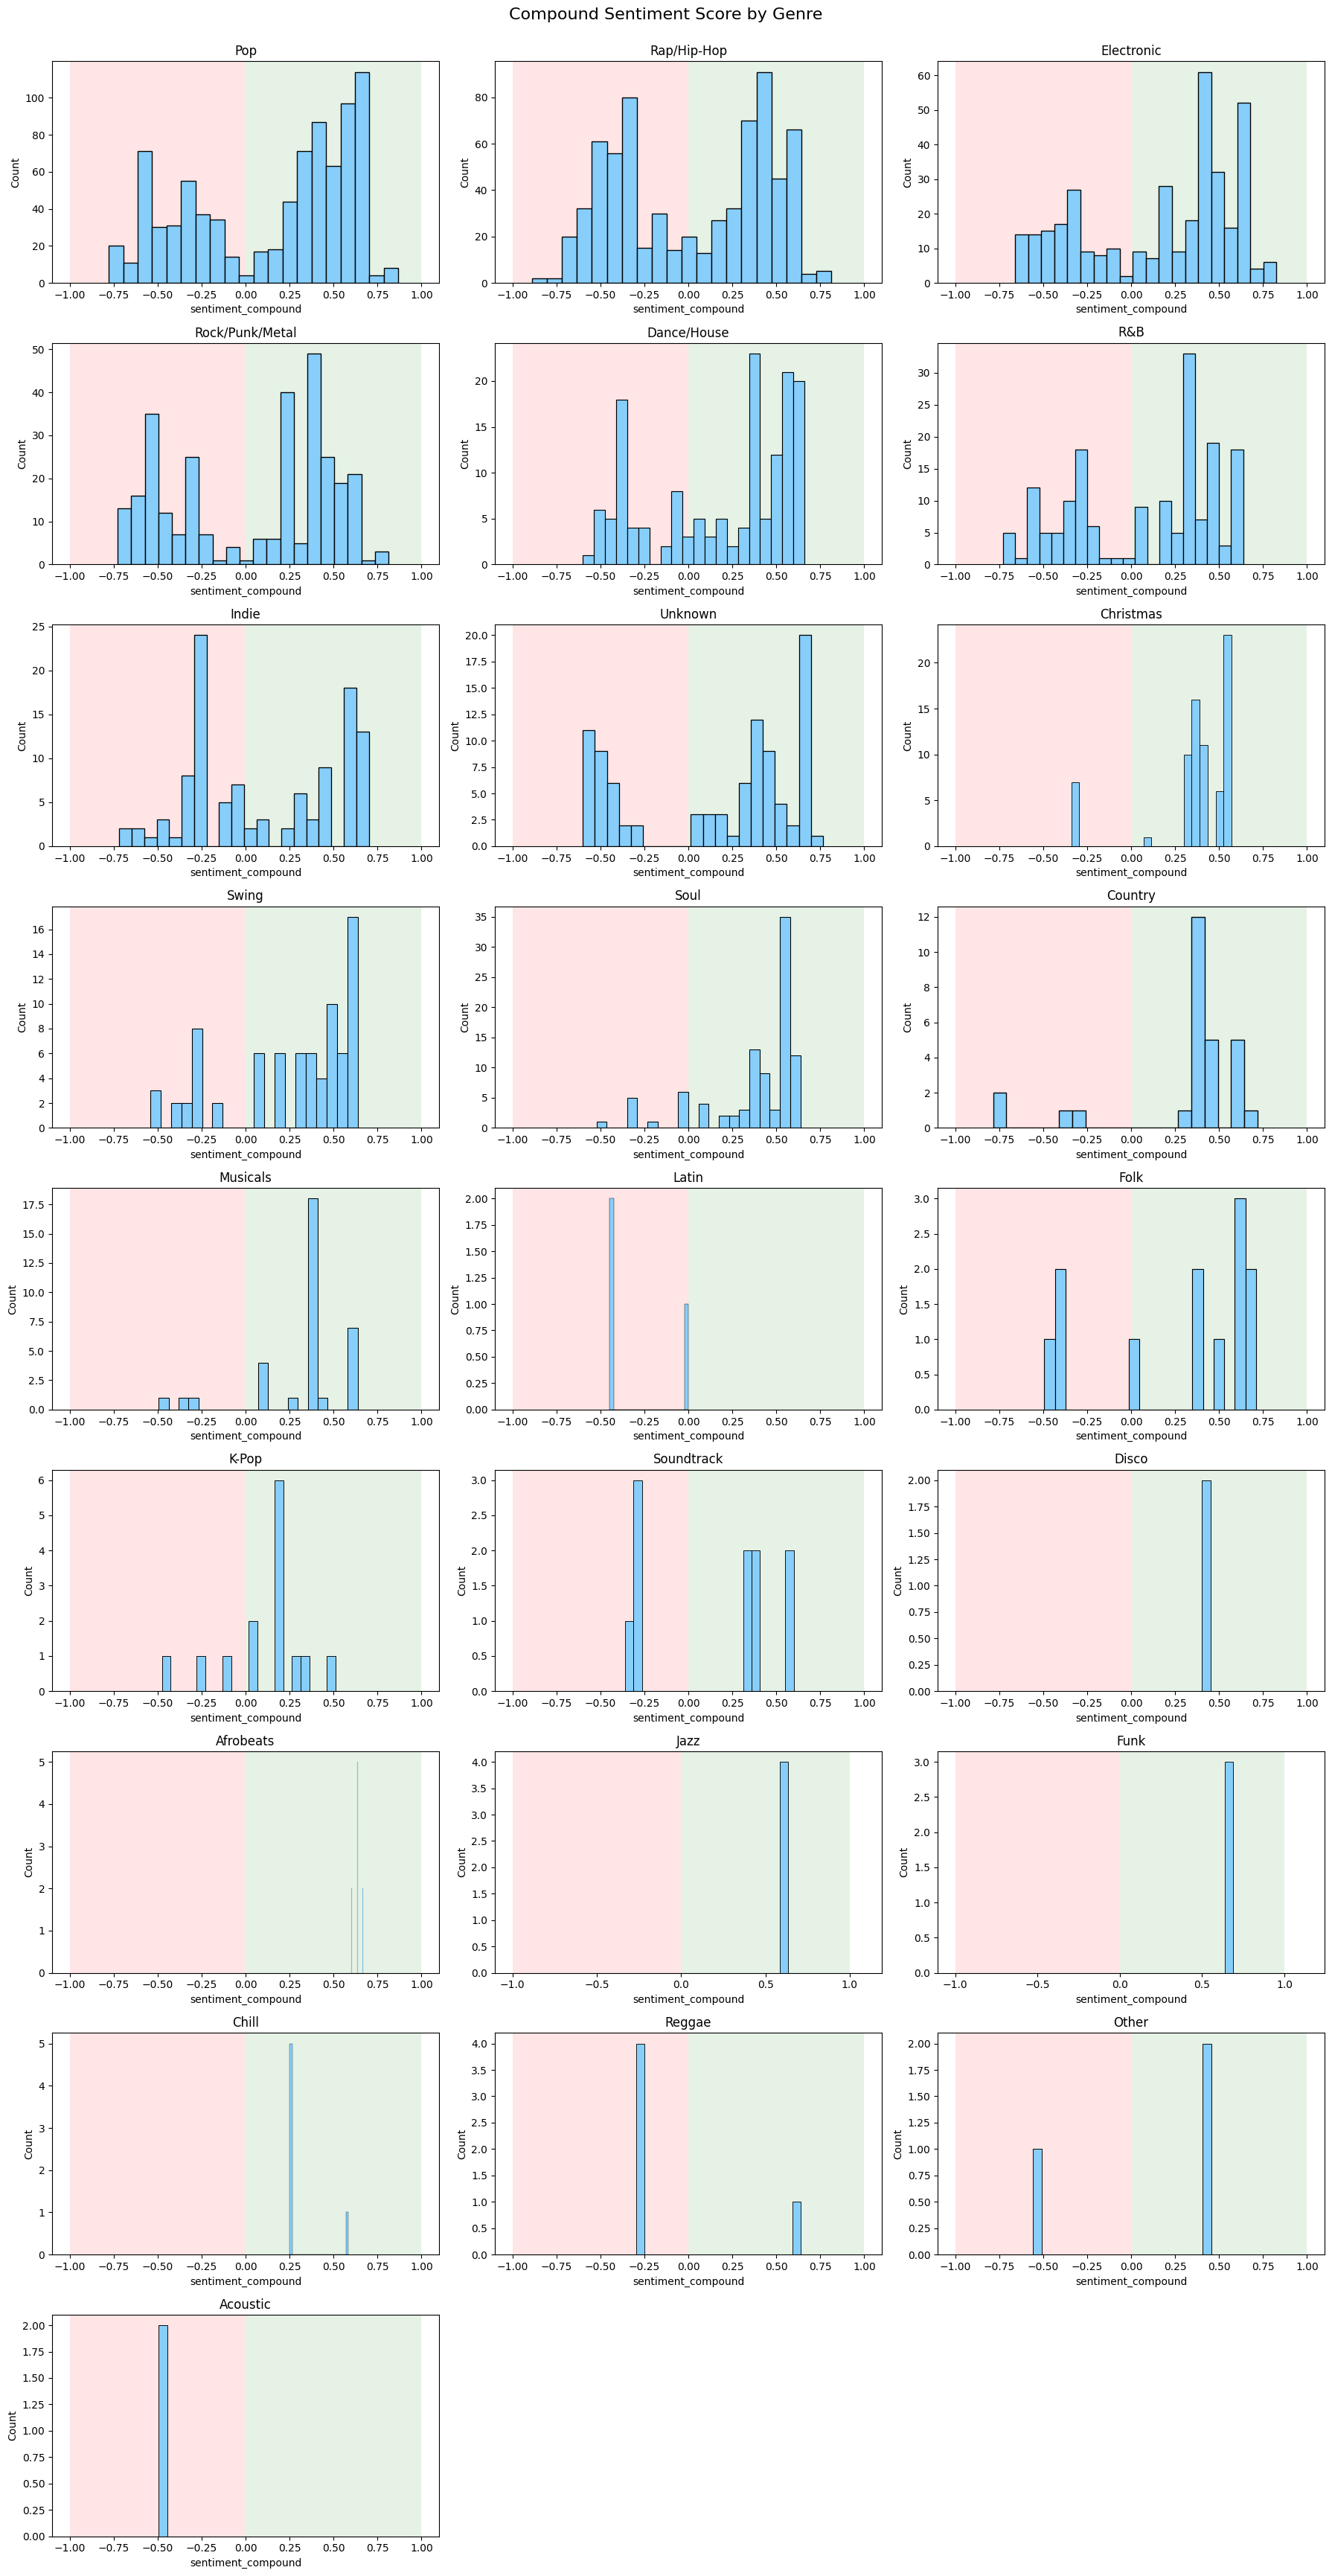

In [10]:
# Replot sentiment score histograms but with only polar data (!= 0)
genre_list = data['Genre_Group'].value_counts().keys()
num_genres = len(genre_list)
cols = 3
rows = math.ceil(num_genres / cols)
data_withsentiment = data.loc[data['sentiment_neu']!=1]

plt.figure(figsize=(6 * cols, 4 * rows))
plt.suptitle('Compound Sentiment Score by Genre', fontsize=16, y=0.96)

for index, genre in enumerate(genre_list):
    plt.subplot(rows, cols, index + 1)
    plt.axvspan(0, 1, facecolor='green', alpha=0.1)
    plt.axvspan(-1, 0, facecolor='red', alpha=0.1)
    sns.histplot(data_withsentiment[data_withsentiment['Genre_Group'] == genre]['sentiment_compound'], alpha=1, color='lightskyblue',bins = 20)
    plt.title(f'{genre}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# '''
# Most genres have most of their songs scored positively.
# '''

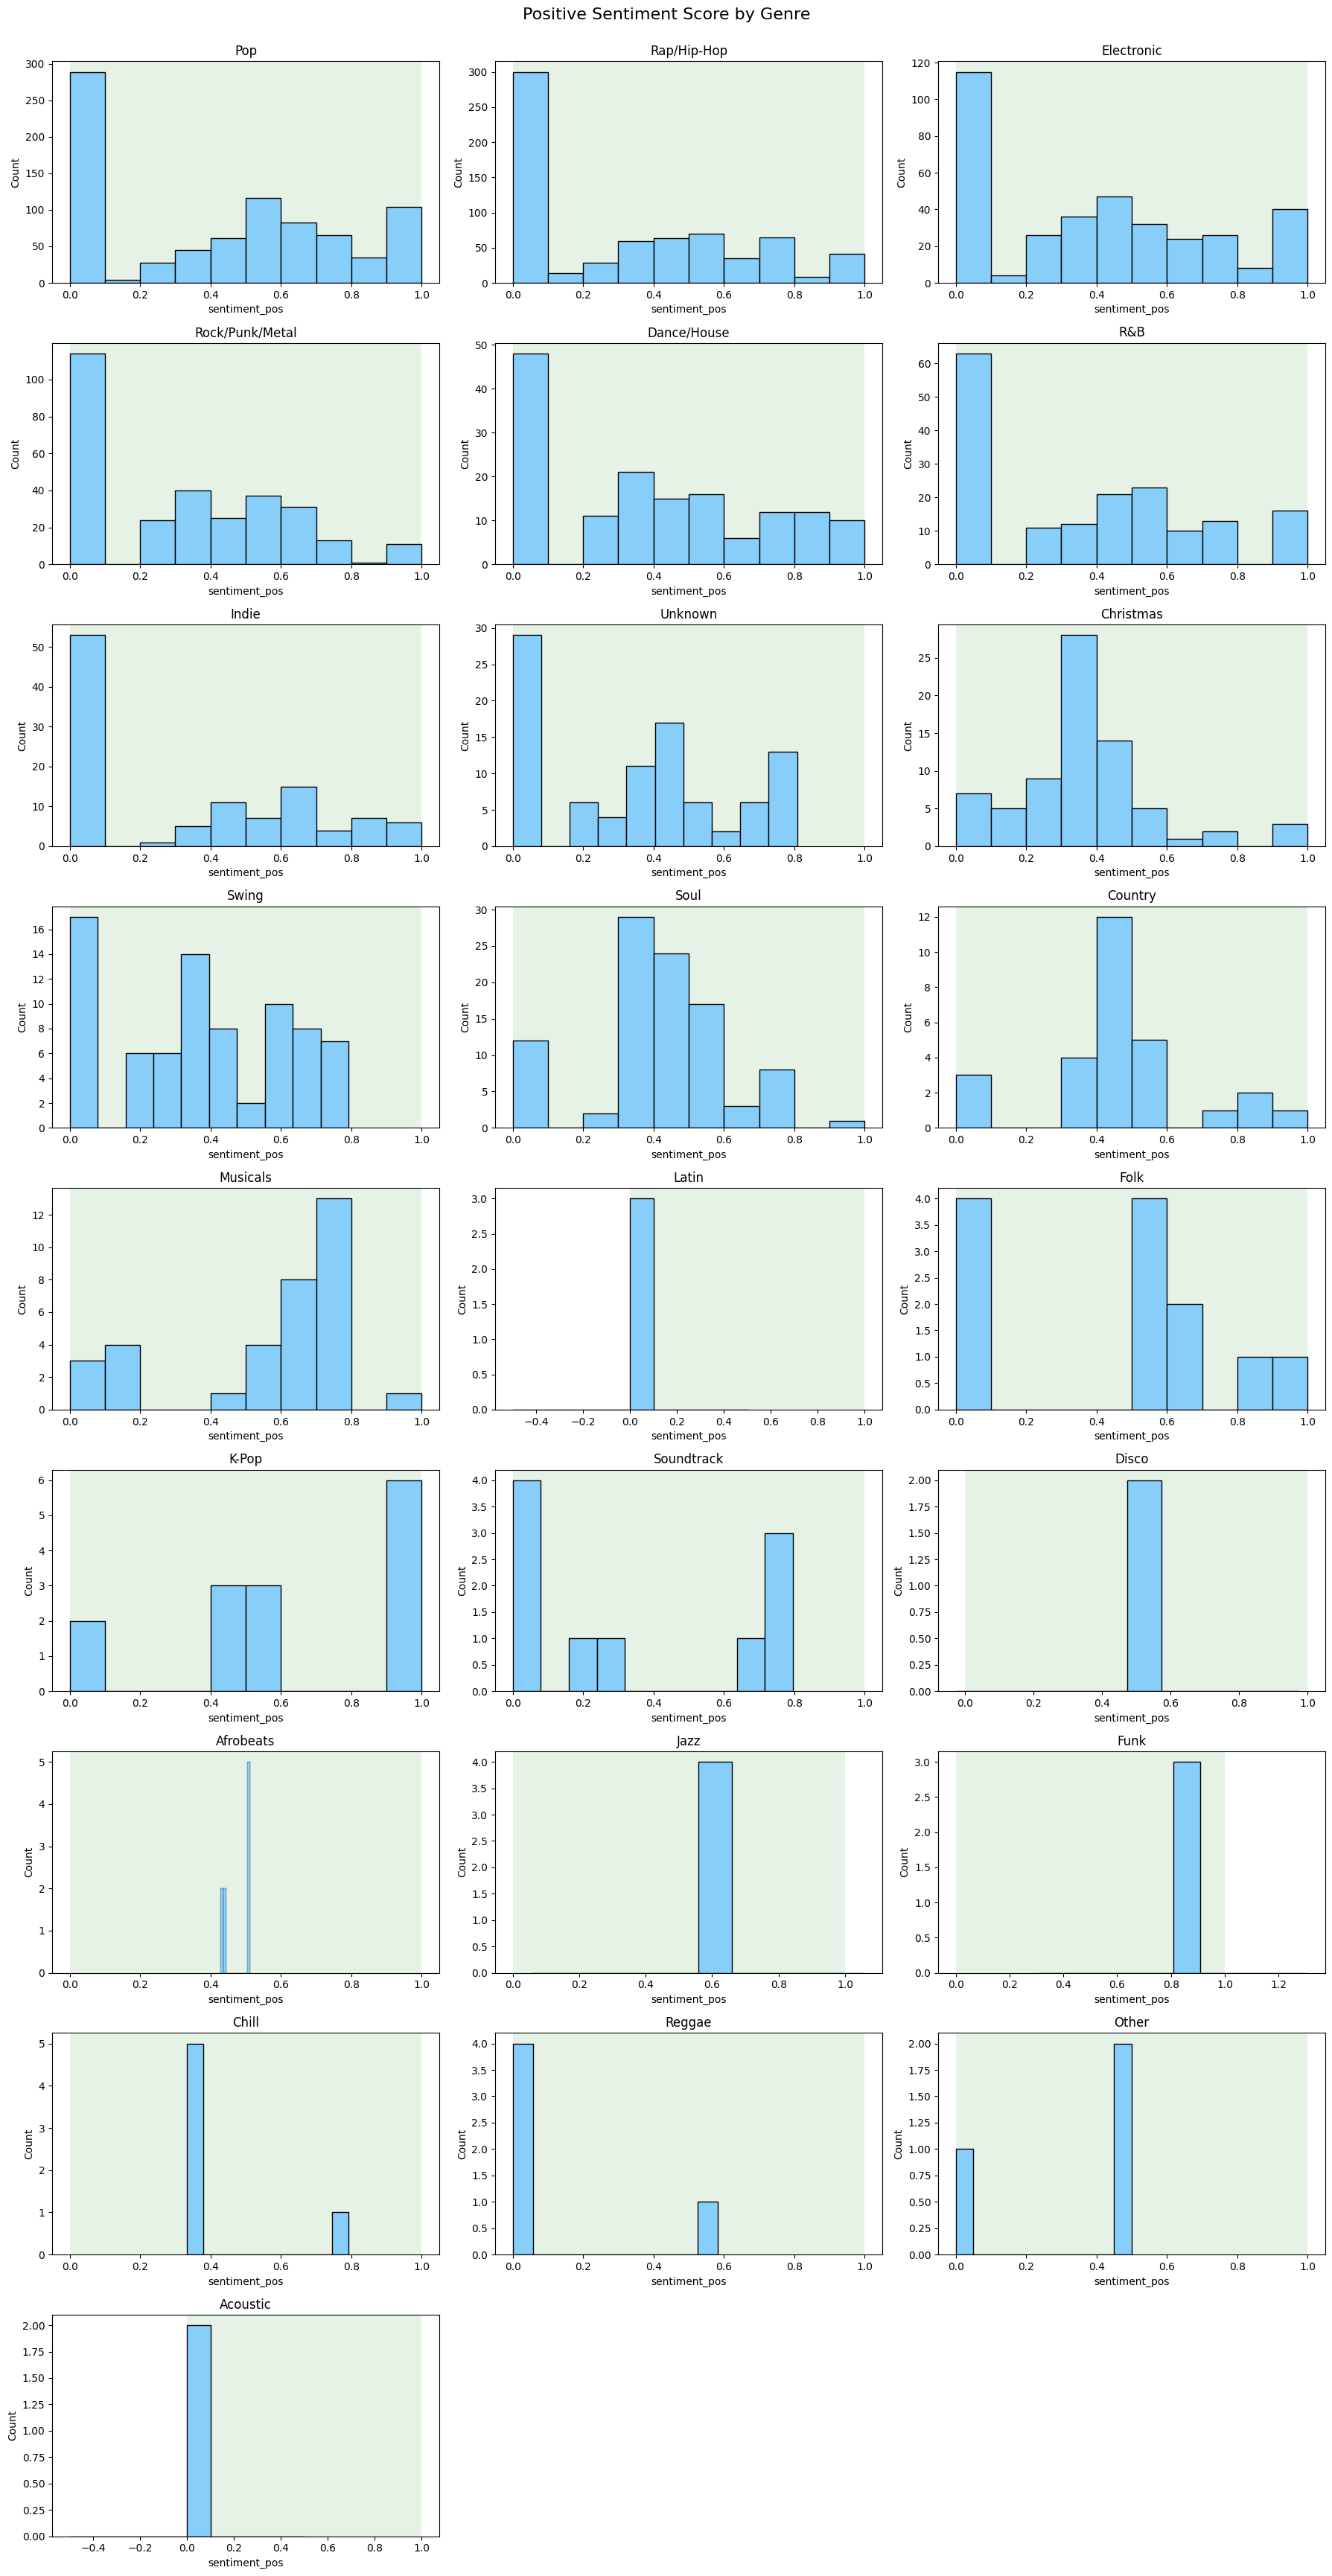

In [11]:
# Plot positive sentiment for each genre
genre_list = data['Genre_Group'].value_counts().keys()
num_genres = len(genre_list)
cols = 3
rows = math.ceil(num_genres / cols)


plt.figure(figsize=(6 * cols, 4 * rows))
plt.suptitle('Positive Sentiment Score by Genre', fontsize=16, y=0.96)

for index, genre in enumerate(genre_list):
    plt.subplot(rows, cols, index + 1)
    plt.axvspan(0, 1, facecolor='green', alpha=0.1)
    sns.histplot(data_withsentiment[data_withsentiment['Genre_Group'] == genre]['sentiment_pos'], alpha=1, color='lightskyblue',bins=10)
    plt.title(f'{genre}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# '''
# There's a high peak near 0 in every histogram, songs with this score should probably be classified as neutral
# '''

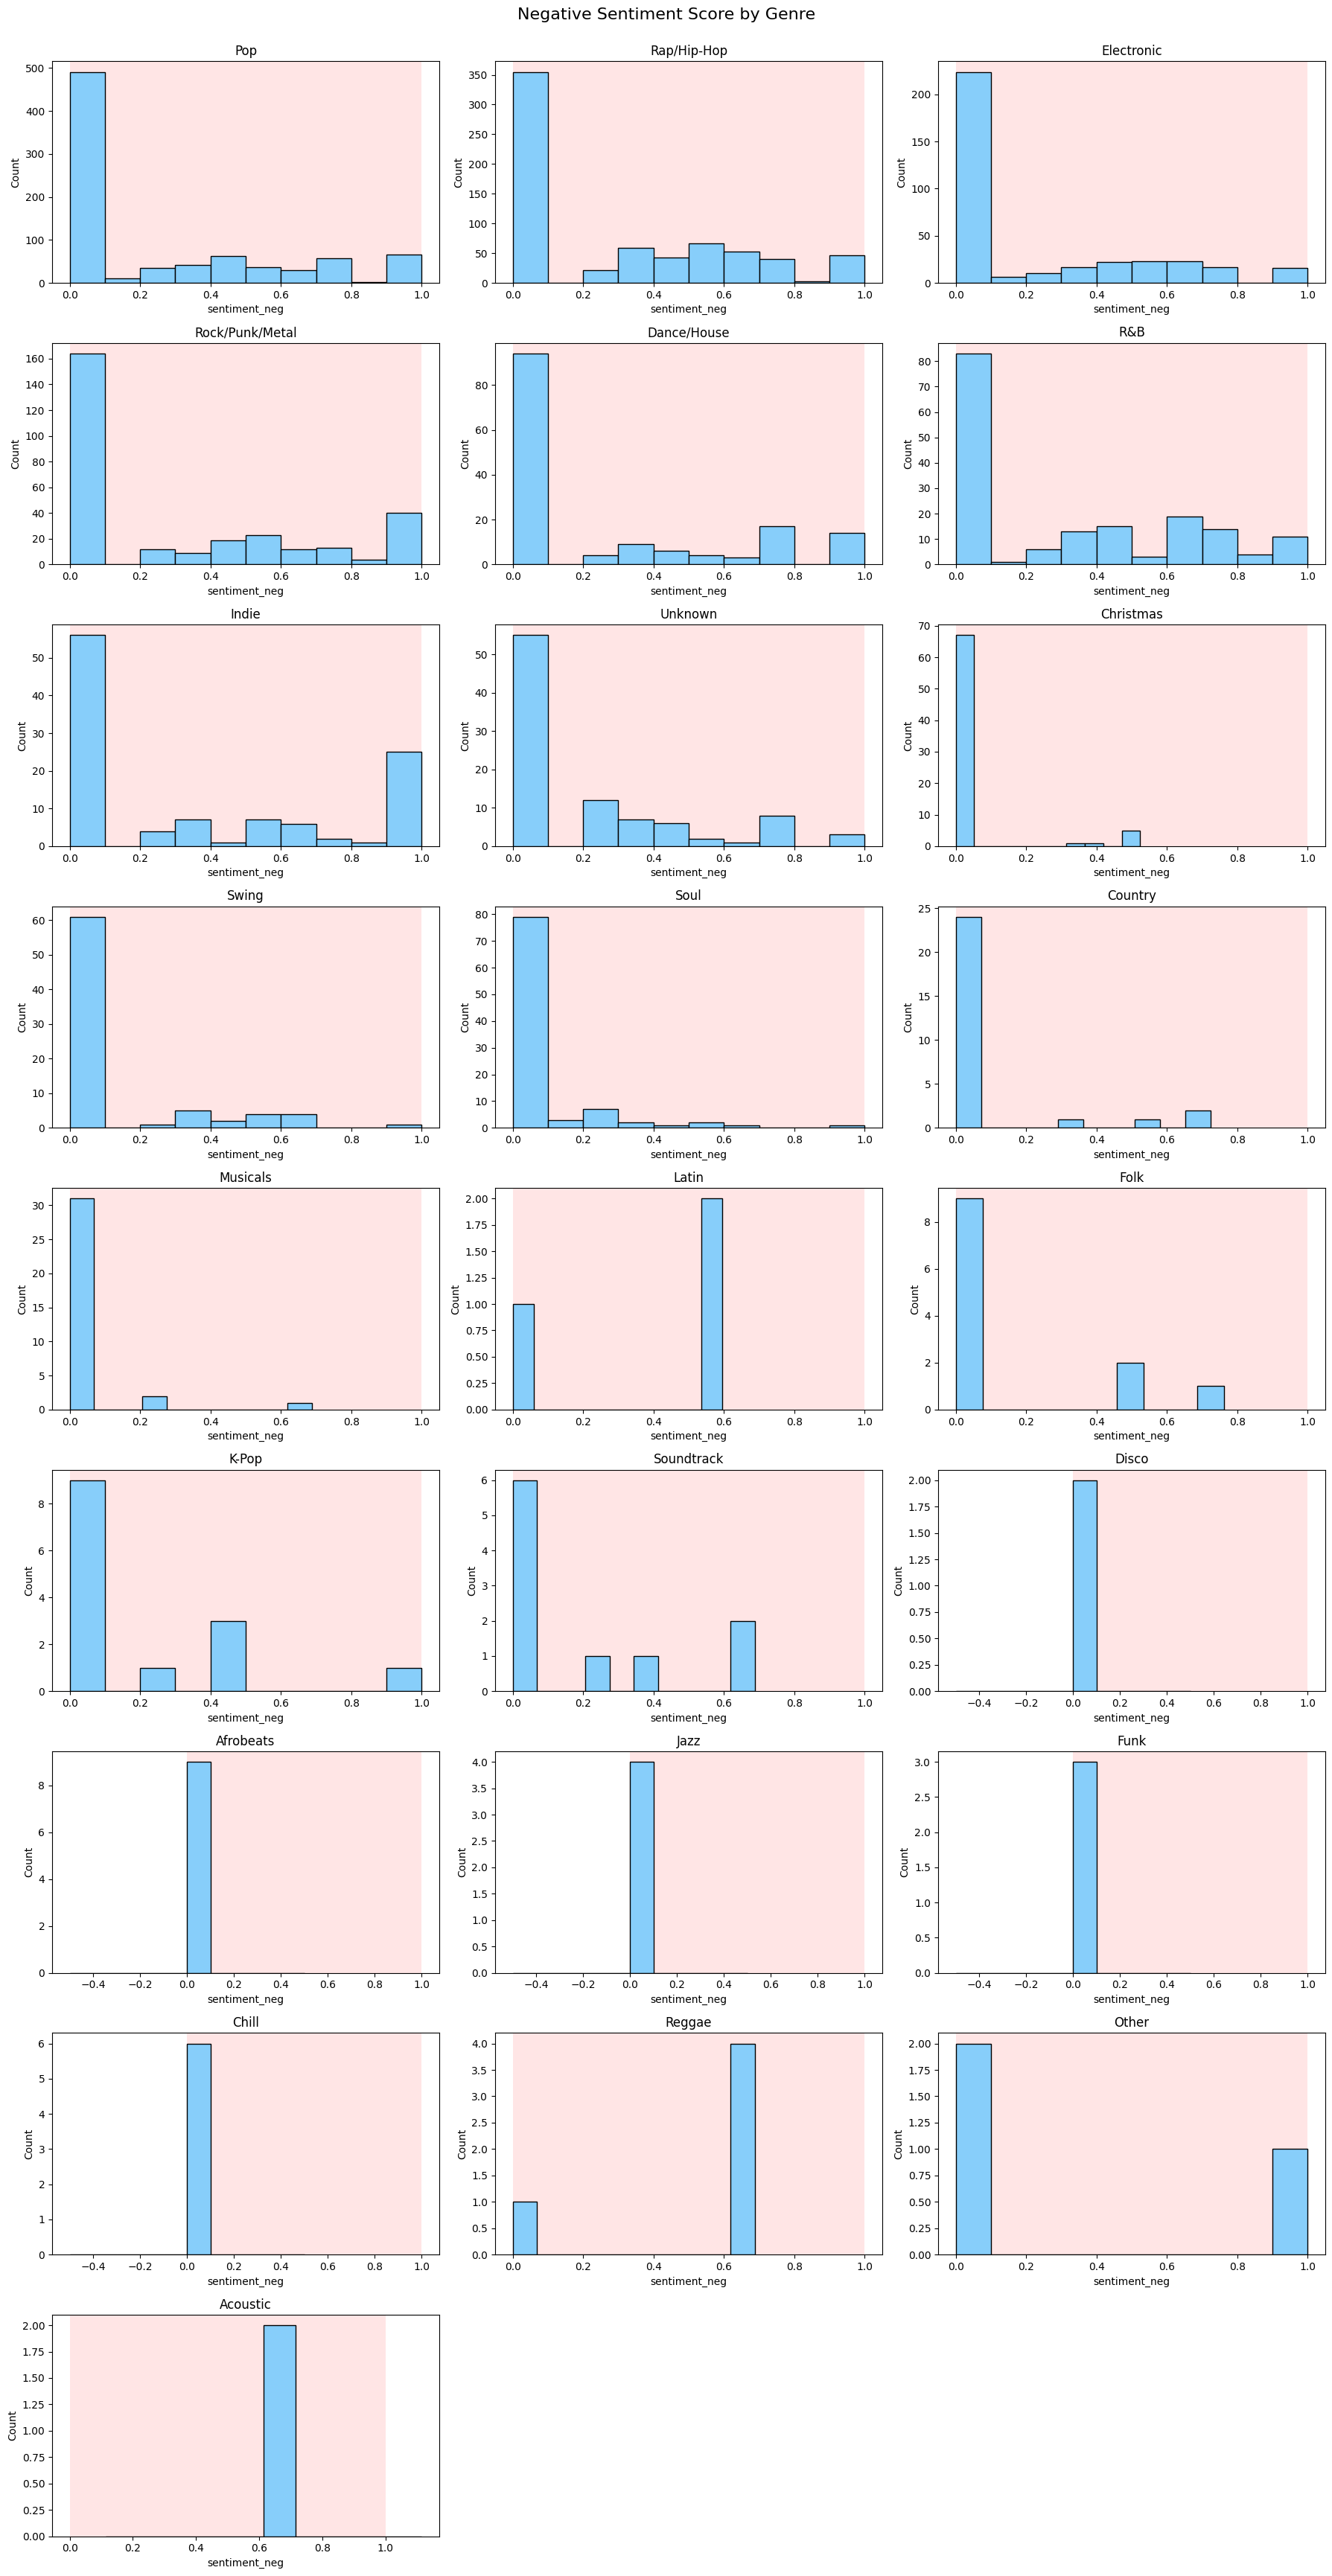

In [12]:
# Plot negative sentiment for each genre
genre_list = data['Genre_Group'].value_counts().keys()
num_genres = len(genre_list)
cols = 3
rows = math.ceil(num_genres / cols)


plt.figure(figsize=(6 * cols, 4 * rows))
plt.suptitle('Negative Sentiment Score by Genre', fontsize=16, y=0.96)

for index, genre in enumerate(genre_list):
    plt.subplot(rows, cols, index + 1)
    plt.axvspan(0, 1, facecolor='red', alpha=0.1)
    sns.histplot(data_withsentiment[data_withsentiment['Genre_Group'] == genre]['sentiment_neg'], alpha=1, color='lightskyblue', bins = 10)
    plt.title(f'{genre}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# '''
# In the negative sentiment scores there's also a similar effect as with the positive, where there's a high peak near 0.
# Rock/Punk/Metal and Indie have a significant amount of datapoint at max negative polarity.
# '''

In [13]:
# Remove songs where (sentiment_pos or sentiment_pos) < 0.1 
#so that means for genres with a lot of datapoints don't get dragged to cero.
data_pos = data_withsentiment[data_withsentiment['sentiment_pos']> 0.2]
data_neg = data_withsentiment[data_withsentiment['sentiment_neg']> 0.2]
data_compound = data_withsentiment[abs(data_withsentiment['sentiment_compound'])> 0.2]

sentiment_means = pd.concat([data_compound.groupby('Genre_Group')['sentiment_compound'].mean(),
                             data_pos.groupby('Genre_Group')['sentiment_pos'].mean(),
                             data_neg.groupby('Genre_Group')['sentiment_neg'].mean(),
                             data_withsentiment.groupby('Genre_Group')['sentiment_compound'].count()],
                            axis=1,
                            keys=['mean_compound', 'mean_positive','mean_negative','song_count'])
sentiment_means[sentiment_means['song_count']>80].sort_values(by='mean_compound', ascending=False)


# '''
# If considering compound sentiment scores and genres with enough data points, Rap/Hip-Hop has the most negative score, 
# followed by Rock/Punk/Metal, R&B and Indie. Most positive would be Soul, Dance/House, Electronic and Pop.

# Christmas genre also scores very high on positive.
# '''

,mean_compound,mean_positive,mean_negative,song_count
Genre_Group,,,,
Soul,0.437778,0.485583,0.425929,96
Dance/House,0.227329,0.571650,0.663035,151
Electronic,0.198990,0.584548,0.591047,358
Pop,0.170483,0.653089,0.612626,830
Unknown,0.151529,0.504406,0.498077,94
Indie,0.133595,0.631536,0.738585,109
R&B,0.082631,0.574226,0.608106,169
Rock/Punk/Metal,0.047737,0.523588,0.663811,296
Rap/Hip-Hop,0.038675,0.576698,0.586876,685


### Compound Sentiment Score Over Time

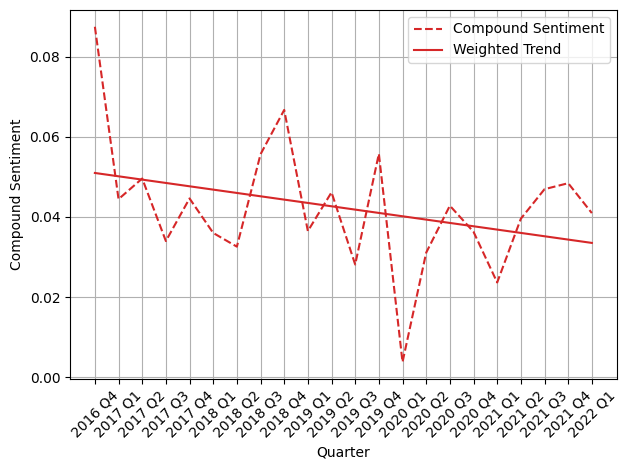

In [14]:
data_test = data.copy()
data_test.dropna(subset='n_streams',inplace=True)

# Group data by quarter
avg_data = data_test.groupby('quarterly_date')['sentiment_compound'].mean().reset_index()

# Plot the mean compound sentiment
plt.plot(avg_data['quarterly_date'], avg_data['sentiment_compound'], color='tab:red', linestyle='--', label='Compound Sentiment')

# Fitting
x = np.arange(len(avg_data))
y = avg_data['sentiment_compound'].values

var_by_quarter = data_test.groupby('quarterly_date')['sentiment_compound'].std() ** 2
weights = 1 / var_by_quarter.values

coef = np.polyfit(x, y, 1, w=weights)
trend = np.polyval(coef, x)

# Plot the weighted trend line
plt.plot(avg_data['quarterly_date'], trend, color='tab:red', linestyle='-', label='Weighted Trend')

# Labeling and formatting
plt.ylabel('Compound Sentiment')
plt.xlabel('Quarter')
plt.tick_params(axis='y')
plt.tick_params(axis='x', rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

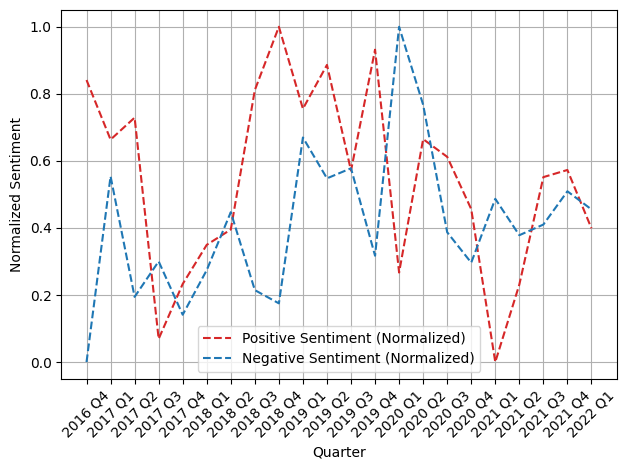

In [15]:
# Group data by quarter
pos_avg = data_test.groupby('quarterly_date')['sentiment_pos'].mean().reset_index()
neg_avg = data_test.groupby('quarterly_date')['sentiment_neg'].mean().reset_index()

# Normalize both series using min-max scaling
pos_min = pos_avg['sentiment_pos'].min()
pos_max = pos_avg['sentiment_pos'].max()
pos_avg['sentiment_pos_norm'] = (pos_avg['sentiment_pos'] - pos_min) / (pos_max - pos_min)

neg_min = neg_avg['sentiment_neg'].min()
neg_max = neg_avg['sentiment_neg'].max()
neg_avg['sentiment_neg_norm'] = (neg_avg['sentiment_neg'] - neg_min) / (neg_max - neg_min)

# Plot the normalized values
plt.plot(pos_avg['quarterly_date'], pos_avg['sentiment_pos_norm'], color='tab:red', linestyle='--', label='Positive Sentiment (Normalized)')
plt.plot(neg_avg['quarterly_date'], neg_avg['sentiment_neg_norm'], color='tab:blue', linestyle='--', label='Negative Sentiment (Normalized)')

# Labeling and formatting
plt.ylabel('Normalized Sentiment')
plt.xlabel('Quarter')
plt.tick_params(axis='y')
plt.tick_params(axis='x', rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


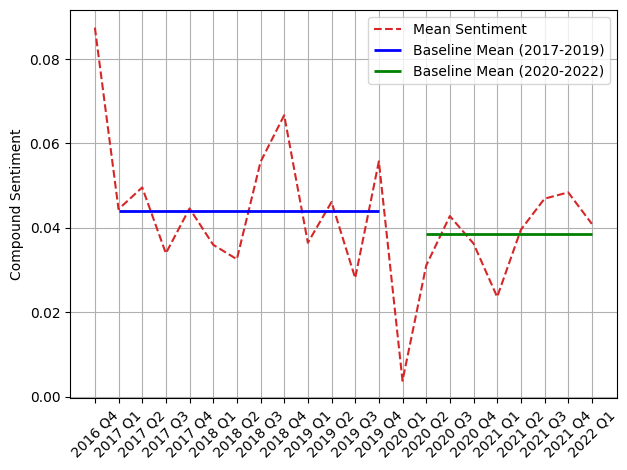

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Group the data and calculate mean and variance
grouped = data_test.groupby('quarterly_date')['sentiment_compound']
avg_sentiment = grouped.mean().reset_index()
std_sentiment = grouped.std().reset_index()
var_sentiment = std_sentiment.copy()
var_sentiment['sentiment_compound'] = var_sentiment['sentiment_compound'] ** 2

# Merge variance into avg_sentiment
avg_sentiment['variance'] = var_sentiment['sentiment_compound']

# Step 2: Define periods as lists of strings
period1_list = ['2017 Q1', '2017 Q2', '2017 Q3', '2017 Q4',
                '2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4',
                '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4']

period2_list = ['2020 Q2', '2020 Q3', '2020 Q4',
                '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4',
                '2022 Q1']

# Step 3: Filter data
period1_df = avg_sentiment[avg_sentiment['quarterly_date'].isin(period1_list)].copy()
period2_df = avg_sentiment[avg_sentiment['quarterly_date'].isin(period2_list)].copy()

# Step 4: Plot the original line
plt.plot(avg_sentiment['quarterly_date'], avg_sentiment['sentiment_compound'],
         color='tab:red', linestyle='--', label='Mean Sentiment')

# Step 5: Horizontal weighted means
def plot_horizontal_baseline(df, label, color):
    weighted_mean = np.average(df['sentiment_compound'], weights=1 / df['variance'])
    plt.hlines(weighted_mean, xmin=df['quarterly_date'].iloc[0],
               xmax=df['quarterly_date'].iloc[-1], colors=color,
               linestyles='-', linewidth=2, label=label)

plot_horizontal_baseline(period1_df, 'Baseline Mean (2017-2019)', 'blue')
plot_horizontal_baseline(period2_df, 'Baseline Mean (2020-2022)', 'green')

# Step 6: Formatting
plt.ylabel('Compound Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

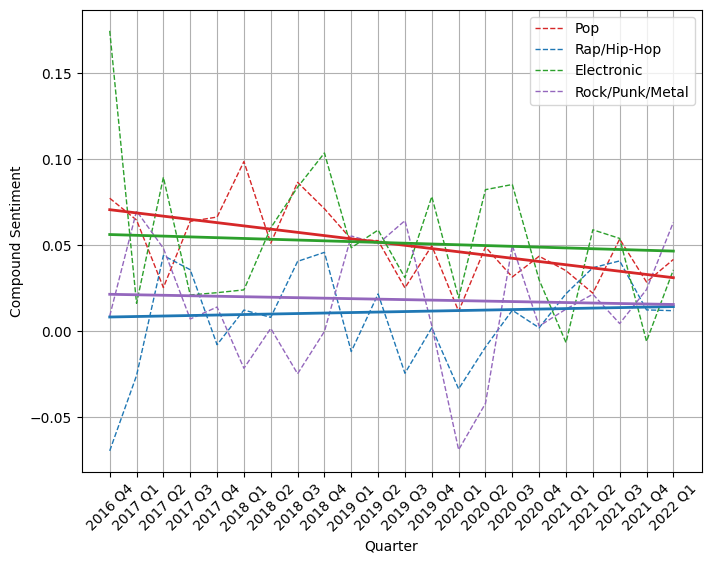

In [17]:
plt.figure(figsize=(8,6))
# Group data by quarter
avg_pop = data_test[data_test['Genre_Group']=='Pop'].groupby('quarterly_date')['sentiment_compound'].mean().reset_index()
avg_rhh = data_test[data_test['Genre_Group']=='Rap/Hip-Hop'].groupby('quarterly_date')['sentiment_compound'].mean().reset_index()
avg_elec = data_test[data_test['Genre_Group']=='Electronic'].groupby('quarterly_date')['sentiment_compound'].mean().reset_index()
avg_rpm = data_test[data_test['Genre_Group']=='Rock/Punk/Metal'].groupby('quarterly_date')['sentiment_compound'].mean().reset_index()

plt.plot(avg_pop['quarterly_date'], avg_pop['sentiment_compound'], label='Pop', color='tab:red', linestyle='--',linewidth=1)
plt.plot(avg_rhh['quarterly_date'], avg_rhh['sentiment_compound'], label='Rap/Hip-Hop', color='tab:blue', linestyle='--',linewidth=1)
plt.plot(avg_elec['quarterly_date'], avg_elec['sentiment_compound'], label='Electronic', color="tab:green", linestyle='--',linewidth=1)
plt.plot(avg_rpm['quarterly_date'], avg_rpm['sentiment_compound'], label='Rock/Punk/Metal', color="tab:purple", linestyle='--',linewidth=1)

# Weighted Linear fit
for avg_df, color, label in zip(
    [avg_pop, avg_rhh, avg_elec, avg_rpm],
    ['tab:red', 'tab:blue', 'tab:green', 'tab:purple'],
    ['Pop', 'Rap/Hip-Hop', 'Electronic','Rock/Punk/Metal']):
    x = np.arange(len(avg_df))
    y = avg_df['sentiment_compound'].values

    # Variance = std^2
    stds = data_test[data_test['Genre_Group'] == label].groupby('quarterly_date')['sentiment_compound'].std().values
    weights = 1 / (stds ** 2)

    coef = np.polyfit(x, y, 1, w=weights)
    trend = np.polyval(coef, x)
    plt.plot(avg_df['quarterly_date'], trend, color=color, linestyle='-', linewidth=2)

plt.xlabel('Quarter')
plt.ylabel('Compound Sentiment')
plt.tick_params(axis='y')
plt.tick_params(axis='x', rotation=45)

plt.legend()

plt.grid()

### Relationship between song sentiment and Economic indicators

In [18]:
econ_data = pd.read_csv('/Users/yrinavera/Desktop/group4-project/data/ONS/ons_filtered.csv')
econ_data.drop(columns=['Unnamed: 0'], inplace=True)
econ_data.rename(columns={'Year Quarter':'quarterly_date','Gross Domestic Product (£m)':'gdp_(£m)','Unemployment Rate (%)':'unemployment_rate_(%)','CPIH (%)':'inflation_(%)','Household Final Consumption Expenditure (£m)':'hfce_(£m)'}, inplace=True)
merged_df = data.merge(econ_data, on='quarterly_date', how='inner')
merged_df.dropna(subset='n_streams',inplace=True)

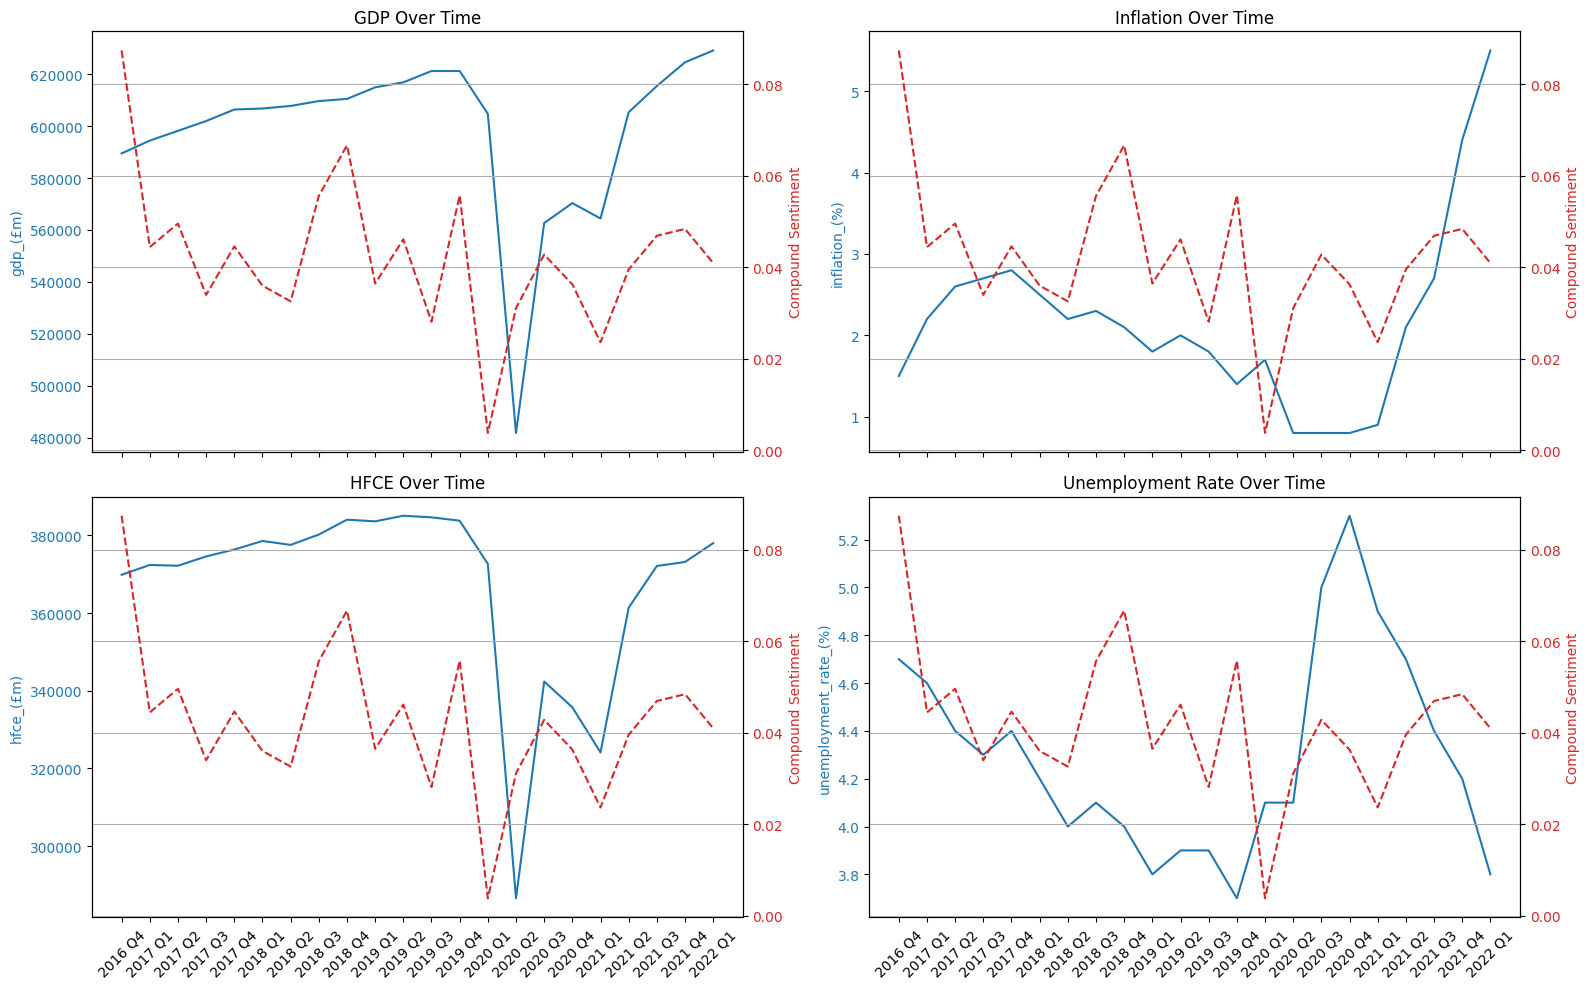

In [19]:
# Define economic indicators and titles
econ_cols = ['gdp_(£m)', 'inflation_(%)', 'hfce_(£m)', 'unemployment_rate_(%)']
titles = ['GDP Over Time', 'Inflation Over Time', 'HFCE Over Time', 'Unemployment Rate Over Time']

# Group data by quarter
avg_data = merged_df.groupby('quarterly_date')[['sentiment_compound'] + econ_cols].mean().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
axs = axs.flatten()

# Plot each economic indicator with negative sentiment overlay
for i, col in enumerate(econ_cols):
    ax = axs[i]
    ax2 = ax.twinx()  
    
    # Plot economic indicator
    ax.plot(avg_data['quarterly_date'], avg_data[col], color='tab:blue', label=col)
    ax.set_ylabel(col, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    
    # Plot sentiment on secondary axis
    ax2.plot(avg_data['quarterly_date'], avg_data['sentiment_compound'], color='tab:red', linestyle='--', label='Compound Sentiment')
    ax2.set_ylabel('Compound Sentiment', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Rotate x-tick labels
    ax.tick_params(axis='x', rotation=45)

    plt.grid()
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


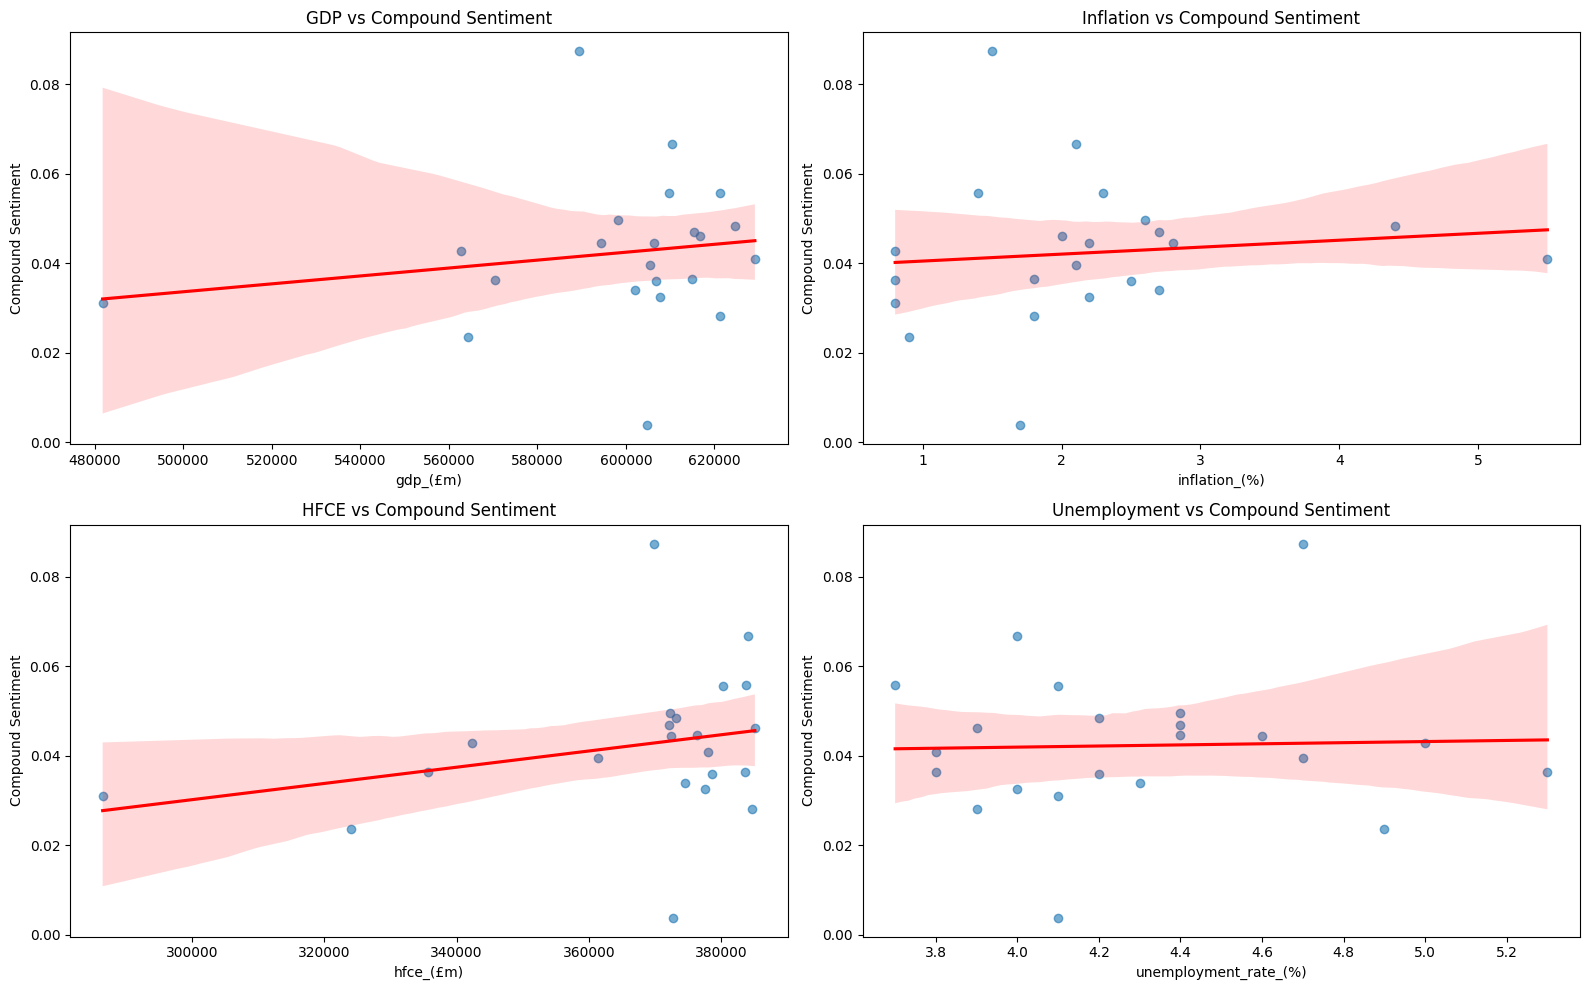

In [20]:
# Define economic columns and titles
econ_cols = ['gdp_(£m)', 'inflation_(%)', 'hfce_(£m)', 'unemployment_rate_(%)']
titles = ['GDP vs Compound Sentiment', 'Inflation vs Compound Sentiment',
          'HFCE vs Compound Sentiment', 'Unemployment vs Compound Sentiment']

# Average by quarter
avg_data = merged_df.groupby('quarterly_date')[
    ['sentiment_compound'] + econ_cols
].mean().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, col in enumerate(econ_cols):
    sns.regplot(
        x=avg_data[col],
        y=avg_data['sentiment_compound'],
        ax=axs[i],
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Compound Sentiment')

plt.tight_layout()
plt.show()


# Figure for Key Takeaways


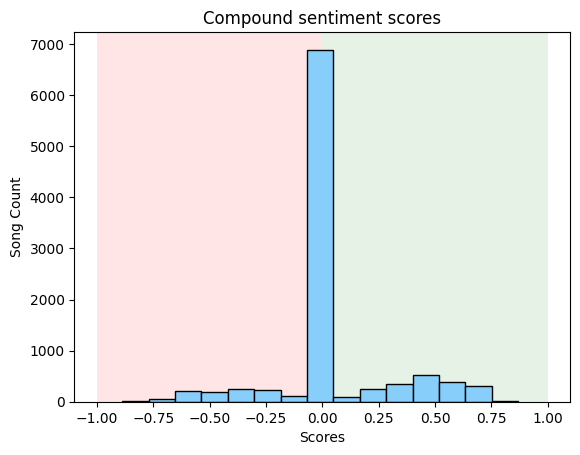

In [27]:
# Sentiment Histogram
plt.axvspan(0, 1, facecolor='green', alpha=0.1)
plt.axvspan(-1, 0, facecolor='red', alpha=0.1)
sns.histplot(data['sentiment_compound'], alpha=1, color='lightskyblue')
plt.title(f'{'sentiment_compound'.split('_')[1].title()} sentiment scores')
plt.xlabel('Scores')
plt.ylabel('Song Count')
# plt.savefig('sentiment_histogram.png', dpi=200)
plt.show()

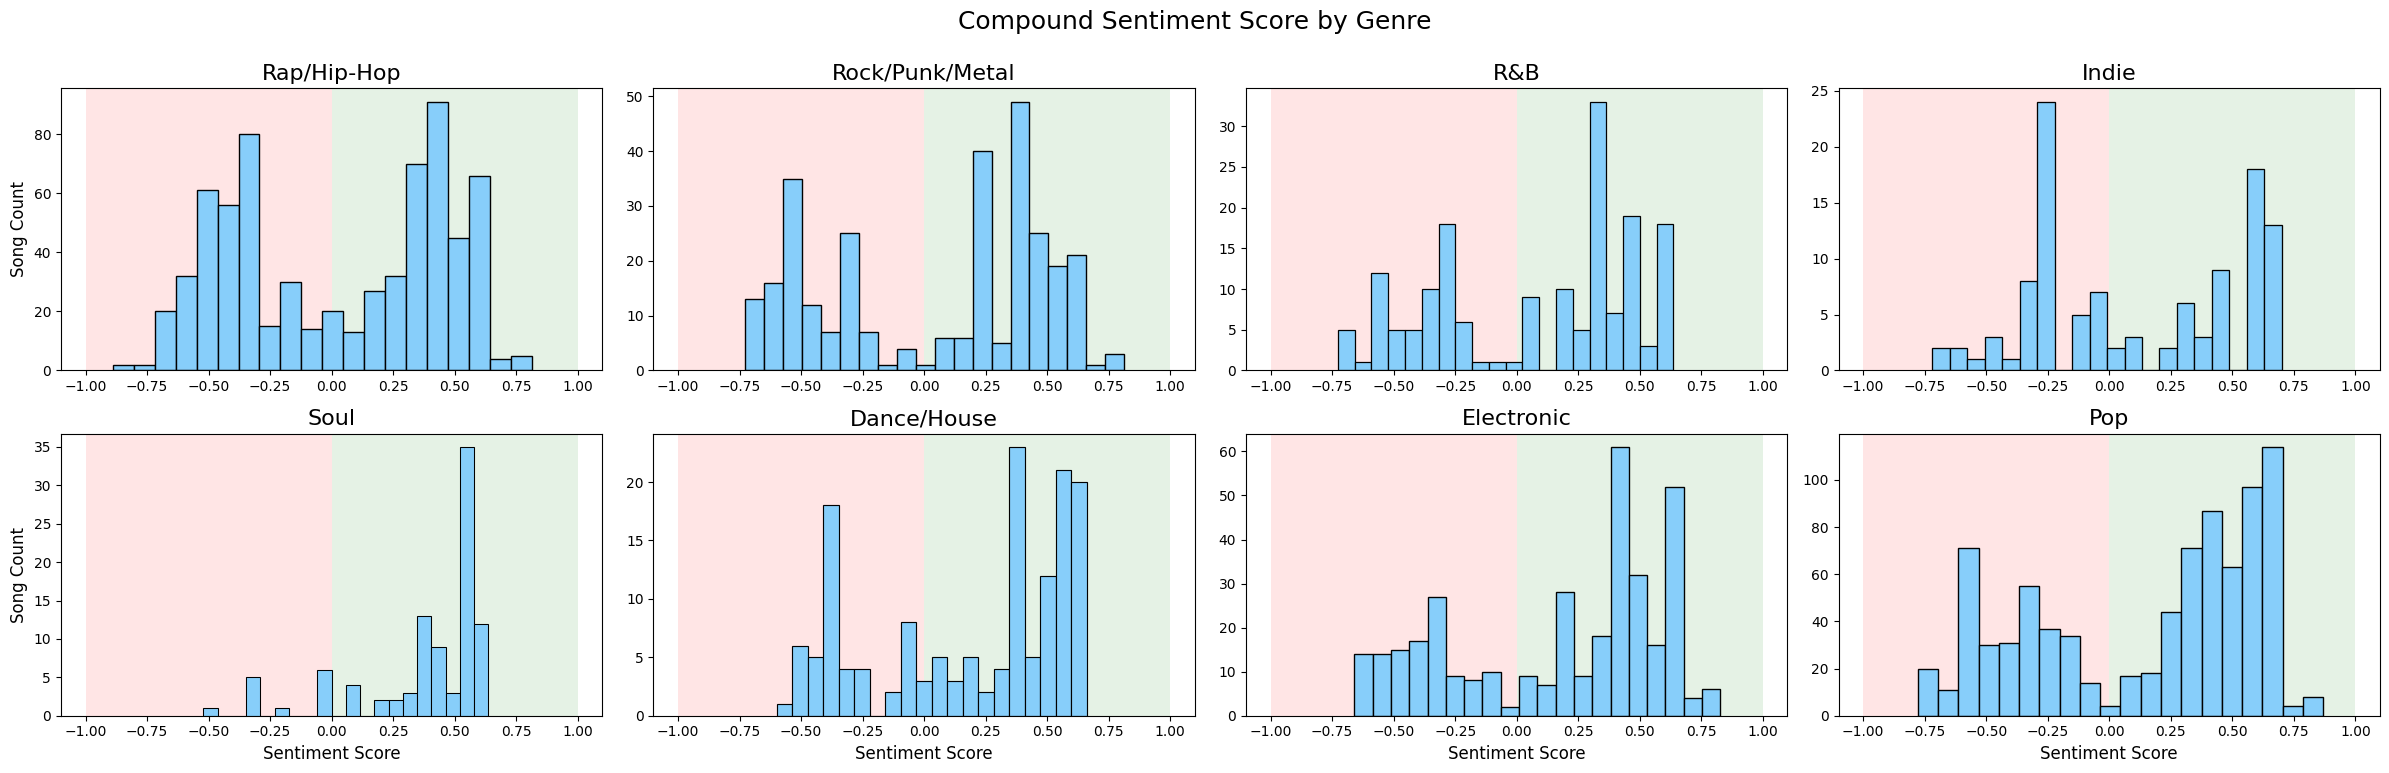

In [22]:
# Sentiment scores by genre
neg_genres = ['Rap/Hip-Hop','Rock/Punk/Metal','R&B','Indie']
pos_genres = ['Soul', 'Dance/House','Electronic','Pop']
genre_list = neg_genres + pos_genres

cols = 4
rows = 2

plt.figure(figsize=(6 * cols, 4 * rows))
plt.suptitle('Compound Sentiment Score by Genre', fontsize=18, y=0.96)

for index, genre in enumerate(genre_list):
    ax = plt.subplot(rows, cols, index + 1)
    plt.axvspan(0, 1, facecolor='green', alpha=0.1)
    plt.axvspan(-1, 0, facecolor='red', alpha=0.1)
    sns.histplot(
        data_withsentiment[data_withsentiment['Genre_Group'] == genre]['sentiment_compound'],
        ax=ax, bins=20, alpha=1, color='lightskyblue'
    )

    # Only show y-axis label on first column
    if index % cols == 0:
        ax.set_ylabel('Song Count', fontsize=12)
    else:
        ax.set_ylabel('')

    # Only show x-axis label on last row
    if index // cols == rows - 1:
        ax.set_xlabel('Sentiment Score', fontsize=12)
    else:
        ax.set_xlabel('')

    ax.set_title(f'{genre}', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('sentiment_by_genre.png',dpi=250)
plt.show()

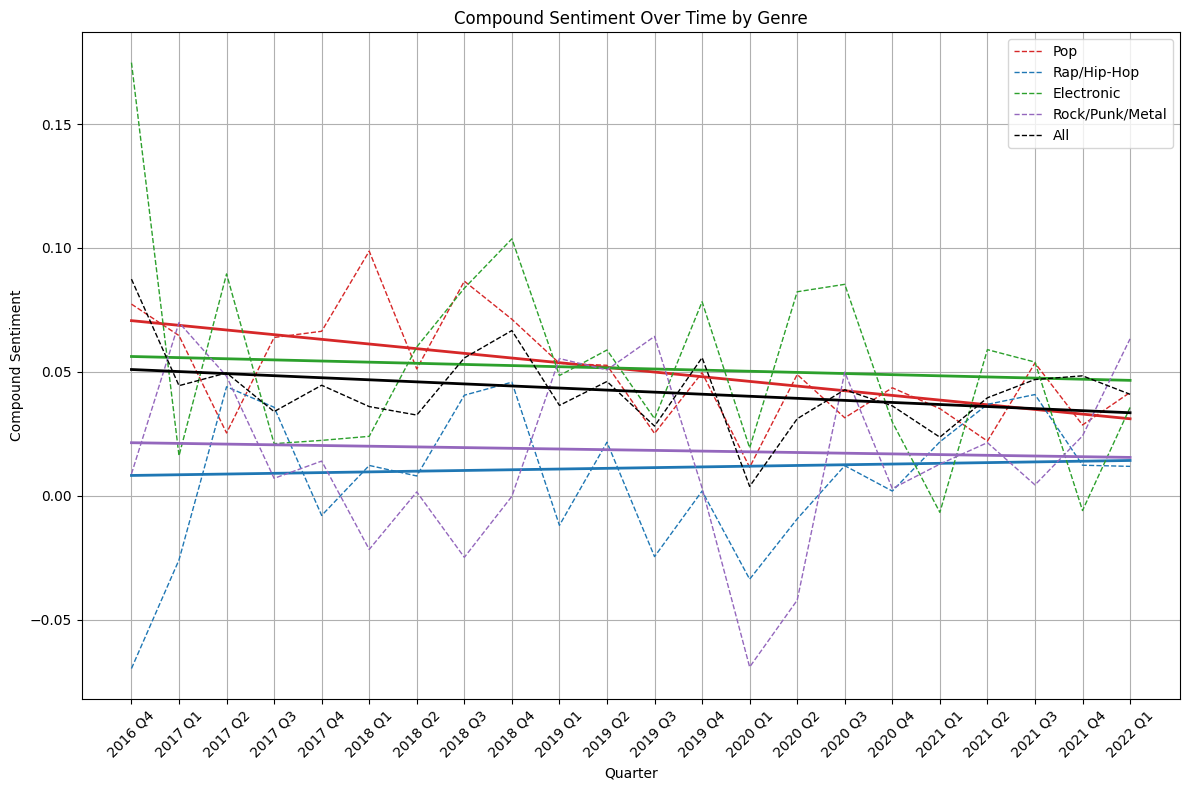

In [24]:
# Plot: Compound Sentiment Over Time by Genre
plt.figure(figsize=(12, 8))

# Define genres and their styles
genres = {
    'Pop': 'tab:red',
    'Rap/Hip-Hop': 'tab:blue',
    'Electronic': 'tab:green',
    'Rock/Punk/Metal': 'tab:purple'
}

# Plot average sentiment per genre
for genre, color in genres.items():
    genre_df = data_test[data_test['Genre_Group'] == genre]
    avg_sentiment = genre_df.groupby('quarterly_date')['sentiment_compound'].mean().reset_index()
    plt.plot(avg_sentiment['quarterly_date'], avg_sentiment['sentiment_compound'],
             label=genre, color=color, linestyle='--', linewidth=1)

    # Weighted linear fit
    x = np.arange(len(avg_sentiment))
    y = avg_sentiment['sentiment_compound'].values
    stds = genre_df.groupby('quarterly_date')['sentiment_compound'].std().values
    weights = 1 / (stds ** 2)

    coef = np.polyfit(x, y, 1, w=weights)
    trend = np.polyval(coef, x)
    plt.plot(avg_sentiment['quarterly_date'], trend, color=color, linestyle='-', linewidth=2)

# Plot average sentiment across all genres
avg_all = data_test.groupby('quarterly_date')['sentiment_compound'].mean().reset_index()
plt.plot(avg_all['quarterly_date'], avg_all['sentiment_compound'],
         label='All', color='black', linestyle='--', linewidth=1)

# Weighted linear fit for all genres
x_all = np.arange(len(avg_all))
y_all = avg_all['sentiment_compound'].values
var_all = data_test.groupby('quarterly_date')['sentiment_compound'].std() ** 2
weights_all = 1 / var_all.values

coef_all = np.polyfit(x_all, y_all, 1, w=weights_all)
trend_all = np.polyval(coef_all, x_all)
plt.plot(avg_all['quarterly_date'], trend_all, color='black', linestyle='-', linewidth=2)

# Plot styling
plt.xlabel('Quarter')
plt.ylabel('Compound Sentiment')
plt.title('Compound Sentiment Over Time by Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


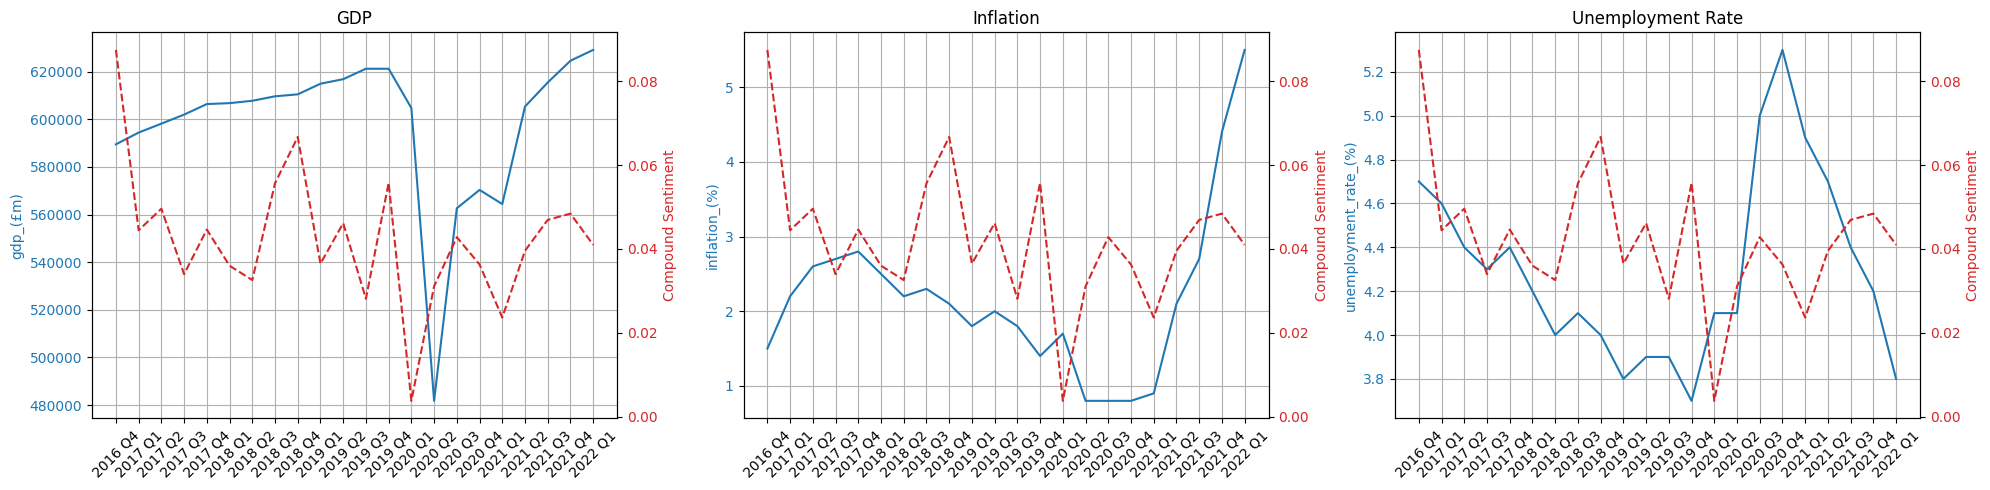

In [26]:
# Sentiment and Economic indicators
# Define economic indicators and titles (exclude HFCE)
econ_cols = ['gdp_(£m)', 'inflation_(%)', 'unemployment_rate_(%)']
titles = ['GDP', 'Inflation', 'Unemployment Rate']

# Group data by quarter
avg_data = merged_df.groupby('quarterly_date')[['sentiment_compound'] + econ_cols].mean().reset_index()

# Create 1-row, 3-column subplot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
axs = axs.flatten()

# Plot each economic indicator with compound sentiment overlay
for i, col in enumerate(econ_cols):
    ax = axs[i]
    ax2 = ax.twinx()

    # Economic indicator
    ax.plot(avg_data['quarterly_date'], avg_data[col], color='tab:blue', label=col)
    ax.set_ylabel(col, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue')

    # Sentiment overlay
    ax2.plot(avg_data['quarterly_date'], avg_data['sentiment_compound'], color='tab:red', linestyle='--', label='Compound Sentiment')
    ax2.set_ylabel('Compound Sentiment', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Formatting
    ax.set_title(titles[i])
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()

# plt.savefig('sentiment_econ.png',dpi=200)
plt.show()


# Key Takeaways
Upon manual inspection, we observed that sentiment_neg often captures the emotional tone of the titles more accurately than sentiment_pos. However, analysis cannot rely solely on sentiment_neg, as the compound score integrates various linguistic weightings and provides a more comprehensive measure. For example:
| Artist        | Song Title  | sentiment\_neg | sentiment\_neu | sentiment\_pos | sentiment\_compound |
| ------------- | ----------- | -------------- | -------------- | -------------- | ------------------- |
| Nelly Furtado | Promiscuous | 1.000          | 0.000          | 0.000          | -0.0772             |
| XXXTENTACION  | SAD!        | 1.000          | 0.000          | 0.000          | -0.5255             |

A large proportion of song titles produced neutral sentiment scores due to their brevity or lack of sentiment-bearing words. Many titles consist of only one or two words, which limits the effectiveness of lexicon-based sentiment analysis models.


<img src="../data/images/sentiment_histogram.png" alt="drawing" width="400"/>
    
To better understand the variation in sentiment, we analysed **sentiment scores across different genres**. We excluded songs where the compound score was exactly 0, as these indicate either a lack of sentiment or the presence of completely neutral language.
The analysis revealed several genre-specific trends:
* Latin songs were overwhelmingly classified as neutral, largely because the sentiment model is designed for English text and does not perform well on non-English input.
* Among the most popular genres, R&B and Pop had the fewest songs marked as neutral, indicating that these titles more often contained sentiment-detectable language.
* Genres such as Soul, Dance/House, Electronic, Pop and Christmas showed a clear tendency towards positive sentiment. In contrast, Rap/Hip-Hop, Rock/Punk/Metal, R&B, and Indie emerged as the most negatively scored genres (among those with significant data).
* 
<img src="../data/images/sentiment_by_genre.png" alt="drawing" width="1000"/>

When observing **sentiment trends over time** (from 2016 Q4 to 2022 Q1—the period with sufficient data coverage), we found a slight decline in average sentiment across all genres. This trend was most evident in Pop music, while Rap/Hip-Hop, Electronic, and Rock/Punk/Metal remained relatively stable.

<img src="../data/images/sentiment_over_time.png" alt="drawing" width="700"/>

We then compared the overall compound sentiment scores to key economic indicators: GDP, inflation, and unemployment rate. Across the full period, we found no consistent or strong correlation between sentiment and these economic measures. However, two prominent dips in sentiment occurred just before and during the COVID-19 lockdown period. This coincided with a sharp fall in GDP, reflecting the economic recession triggered by the pandemic. While not definitive, this alignment suggests a possible influence of economic uncertainty on the sentiment of popular music during that time.

In conclusion, sentiment analysis of song titles provides valuable insight into the emotional tone of popular music across genres and over time. While genre sentiment patterns are evident, direct correlations between musical sentiment and macroeconomic indicators appear limited, with some notable exceptions during periods of significant economic disruption. This suggests that while broader trends in popular sentiment may be influenced by cultural and economic events, the relationship is likely to be complex and indirect.

<img src="../data/images/sentiment_econ.png" alt="drawing" width="1100"/>